In [1]:
import pandas as pd
data = pd.read_csv('currentdist.csv',  delim_whitespace=True) 
# Replace 'data.txt' with the path to your .txt file
data.head()




,x,y,z,rxy,Bx,By,Bz,G,t,m,q,nmacro,rmacro,ID
0,-0.000117,-0.000554,7.6,0.000566,0.000130,-0.000293,0.603855,1.254557,4.208515e-08,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,1.0
1,-0.000382,-0.000245,7.6,0.000454,-0.000274,0.000144,0.603881,1.254588,4.208932e-08,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,2.0
2,0.000034,-0.000192,7.6,0.000195,0.000879,-0.000498,0.603895,1.254606,4.209201e-08,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,3.0
3,-0.000053,-0.000049,7.6,0.000073,-0.000368,-0.000022,0.603884,1.254591,4.209354e-08,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,4.0
4,-0.000445,0.000251,7.6,0.000511,-0.000092,0.000142,0.604005,1.254736,4.209840e-08,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,5.0


In [2]:
data['x']

0      -0.000117
1      -0.000382
2       0.000034
3      -0.000053
4      -0.000445
          ...   
9366    0.000057
9367    0.000561
9368   -0.000146
9369    0.000030
9370    0.000409
Name: x, Length: 9371, dtype: float64

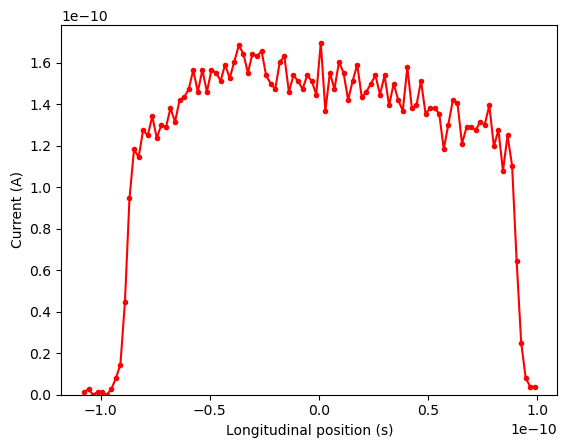

-1.368e-13
-0.0006551856751245711
2.0879577376900081e-10
4.2085148077659e-08


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract longitudinal positions (time) and charges
t = data["t"]
#t = T -np.mean(T)
q = data["q"]*data['nmacro']

# Define beam parameters
gamma = np.mean(data["G"])

# Calculate beam current
num_particles = len(t)
total_charge = -1.368*1e-13
pulse_length = np.max(t) - np.min(t)  # s
current = total_charge / pulse_length

# Calculate current density
num_bins = 100
bin_edges = np.linspace(np.min(t), np.max(t), num_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_widths = bin_edges[1:] - bin_edges[:-1]

hist, _ = np.histogram(t, bins=bin_edges, weights=q)
current_density = hist / (bin_widths * num_particles)

# Create longitudinal current profile plot
plt.plot(bin_centers-np.mean(t), current_density * current, '.-r')
plt.ylim(0)
plt.xlabel("Longitudinal position (s)")
plt.ylabel("Current (A)")
plt.show()
print(total_charge)
print(current)
print(pulse_length)
#print(current_density)
print(np.min(t))

In [4]:
print(len(t))

9371


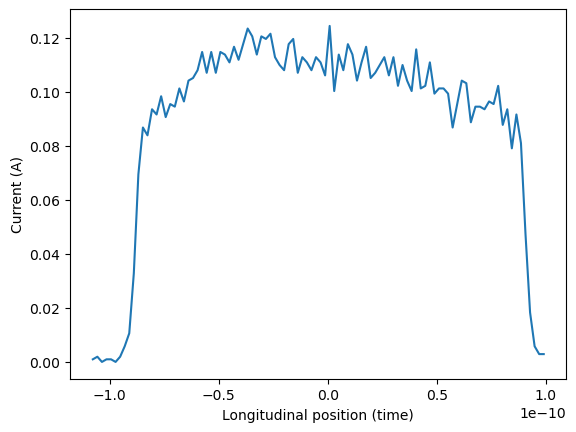

In [5]:
# Extract longitudinal positions (time) and charges
t = data["t"]
nmacro=data['nmacro']
q = data["q"]*data['nmacro']

# Define beam parameters
gamma = np.mean(data["G"])

# Calculate beam current
num_particles = len(t)
total_charge = np.sum(q)
pulse_length = np.max(t) - np.min(t)  # s
current = total_charge / pulse_length*245

# Calculate current density
num_bins = 100
bin_edges = np.linspace(np.min(t), np.max(t), num_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_widths = bin_edges[1:] - bin_edges[:-1]

hist, _ = np.histogram(t, bins=bin_edges, weights=q)
current_density = hist / (bin_widths * num_particles)

# Create longitudinal current profile plot
plt.plot(bin_centers-np.mean(t), -current_density*1000000/2.08)
plt.xlabel("Longitudinal position (time)")
plt.ylabel("Current (A)")
plt.show()

In [6]:
print(total_charge)
print(current)
print(pulse_length)
#print(current_density)
print(np.min(t))

-3.680793587174297e-13
-0.43190262550782965
2.0879577376900081e-10
4.2085148077659e-08


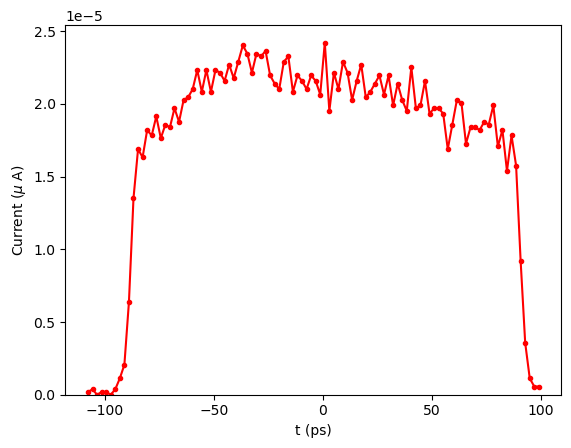

In [7]:
# Extract longitudinal positions (time) and charges
t = data["t"]
q = data["q"]
n = data['nmacro']
# Define beam parameters
gamma = np.mean(data["G"])

# Calculate beam current
f= 249.5e+6
num_particles = len(t)
total_charge = np.sum(q*n)
pulse_length = np.max(t) - np.min(t)  # s
#current = total_charge / pulse_length
current = total_charge*f
# Calculate current density
num_bins = 100
bin_edges = np.linspace(np.min(t), np.max(t), num_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_widths = bin_edges[1:] - bin_edges[:-1]

hist, _ = np.histogram(t, bins=bin_edges, weights=q)
current_density = hist*f/(bin_widths * num_particles)

# Create longitudinal current profile plot
plt.plot((bin_centers-np.mean(t))*1e+12, current_density*current, '.-r')
plt.xlabel("t (ps)")
plt.ylim(0)
plt.ylabel("Current ($\mu$ A)")
plt.show()

In [8]:
data["t"].std()

5.016884719491105e-11

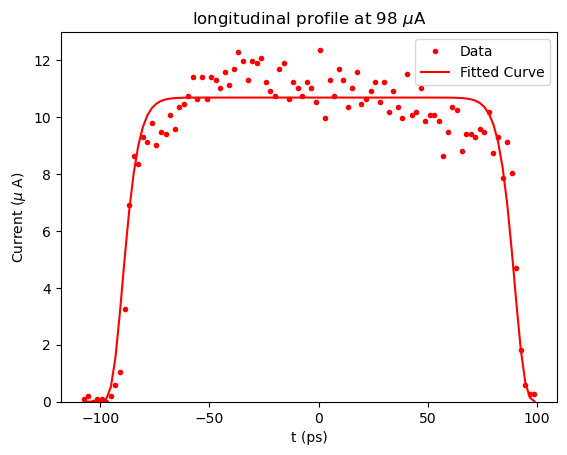

Fitted Parameters:
A = 10.681016342784142
sigma = 90.14853411659831
m = 10.135105738992275


In [9]:
x= (bin_centers-np.mean(t))*1e+12
y=current_density*current*1e+6/1.958


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the super-Gaussian function
def super_gaussian(x, A, sigma, m):
    return A * np.exp(-((np.abs(x) / sigma) ** (2 * m)))

# Fit the data to the super-Gaussian function
initial_guess = [5, 30, 3]  # Initial guess for the parameters
params, _ = curve_fit(super_gaussian, x, y, p0=initial_guess)

# Extract the fitted parameters
A_fit, sigma_fit, m_fit = params
# Extract the fitted parameters

# Plot the original data and the fitted curve
plt.plot(x, y, '.r', label='Data', )
plt.plot(x, super_gaussian(x, A_fit, sigma_fit, m_fit), '-r', label='Fitted Curve')
plt.title("longitudinal profile at 98 $\mu$A")
plt.xlabel("t (ps)")
plt.ylim(0)
plt.savefig('plot2.png')  # Specify the desired file name and extension
plt.ylabel("Current ($\mu$ A)")
plt.legend()
plt.show()

print("Fitted Parameters:")
print("A =", A_fit)
print("sigma =", sigma_fit)
print("m =", m_fit)

In [10]:
np.std(x)

60.27113431284319

In [11]:
print(total_charge)
print(current)
print(pulse_length)
#print(current_density)
print(np.mean(t))
print(bin_widths)

-3.680793587174297e-13
-9.18357999999987e-05
2.0879577376900081e-10
4.219391795402143e-08
[2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774

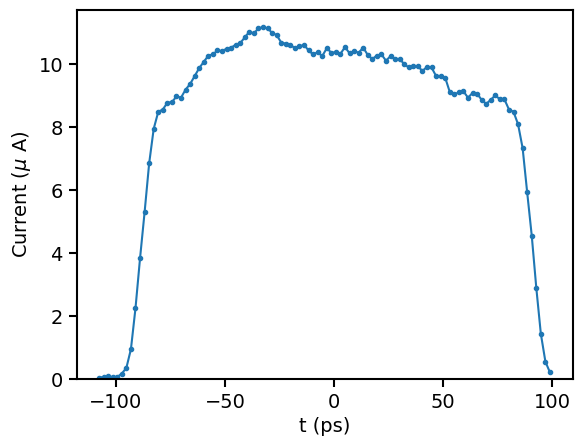

In [41]:
# Extract longitudinal positions (time) and charges
t = data["t"]
q = data["q"]#*data['nmacro']
n = data['nmacro']
# Define beam parameters
gamma = np.mean(data["G"])

# Calculate beam current
f= 249.5e+6
num_particles = len(t)
total_charge = np.sum(q*n)
pulse_length = np.max(t) - np.min(t)  # s
#current = total_charge / pulse_length
current = total_charge*f
# Calculate current density
num_bins = 100
bin_edges = np.linspace(np.min(t), np.max(t), num_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_widths = bin_edges[1:] - bin_edges[:-1]

hist, _ = np.histogram(t, bins=bin_edges, weights=q)
current_density = hist*f/(bin_widths * num_particles)

# Create longitudinal current profile plot
#plt.plot((bin_centers-np.mean(t))*1e+12, current_density*current*1e+6/2.08, '.-r')
#plt.xlabel("t (ps)")
#plt.ylim(0)
#plt.ylabel("Current ($\mu$ A)")
#plt.show()
#from scipy.interpolate import interp1d

# Load particle distribution data from the GPT.txt file
#data = np.loadtxt("gpt.txt")  # Replace with your GPT.txt file

# Extract the relevant columns (assuming z and current are in the 1st and 2nd columns)
#z = data[:, 0]
#current = data[:, 1]

# Perform smoothing using cubic spline interpolation
#interp_func = interp1d(bin_centers, current_density*current, kind='linear')
#t_smooth = np.linspace(np.min(bin_centers), np.max(bin_centers), 8000)  # Adjust the number of points for smoothness
#current_smooth = interp_func(t_smooth)
# Apply moving average smoothing
window_size = 5  # Adjust the window size as needed
smoothed_current_density = np.convolve(current_density, np.ones(window_size)/window_size, mode='same')
# Create the smoothed longitudinal current profile plo
# Increase the size of ticks and borders
plt.tick_params(axis='both', which='both', length=6, width=1.5, labelsize=14)
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
#plt.rcParams['font.family'] = 'Times New Roman'
# Adjust the plot scale
#plt.gca().set_aspect('equal')  # Set aspect ratio if desired

#plt.plot((bin_centers-np.mean(t))*1e+12, current_density*current*1e+6/2.08, '.-b', label='original')
plt.plot((bin_centers-np.mean(t))*1e+12, smoothed_current_density*current*1e+6/2.08,'.-', label='smothed')
plt.xlabel("t (ps)", fontsize=14 )
plt.ylim(0)
#plt.title("Longitudinal Current Profile")
plt.ylabel("Current ($\mu$ A)",fontsize=14, )
#plt.legend(fontsize=14)
plt.show()


In [13]:
np.std(bin_centers)

6.027113431284318e-11

In [14]:
np.std(bin_centers)

6.027113431284318e-11

In [15]:
print(total_charge)
print(current)
print(pulse_length)
#print(current_density)
print(np.mean(t))
print(bin_widths)

-3.680793587174297e-13
-9.18357999999987e-05
2.0879577376900081e-10
4.219391795402143e-08
[2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774

In [16]:
import pandas as pd
df1 = pd.read_csv('currentdist98uA0.2m.csv',  delim_whitespace=True) 
# Replace 'data.txt' with the path to your .txt file
df1.head()

,x,y,z,rxy,Bx,By,Bz,G,t,m,q,nmacro,rmacro,ID
0,0.000142,-0.002106,0.2,0.002111,-0.000035,0.004990,0.603712,1.254411,1.203486e-09,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,1.0
1,0.000024,-0.001973,0.2,0.001974,0.000529,0.004383,0.603721,1.254416,1.208542e-09,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,2.0
2,0.000589,-0.002434,0.2,0.002504,-0.000835,0.004920,0.603716,1.254416,1.211591e-09,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,3.0
3,-0.000229,-0.002204,0.2,0.002216,0.000394,0.004412,0.603711,1.254405,1.212262e-09,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,4.0
4,0.000211,-0.002260,0.2,0.002270,0.000369,0.004082,0.603728,1.254422,1.221179e-09,9.109530e-31,-1.602189e-19,245.155548,1.800000e-07,5.0


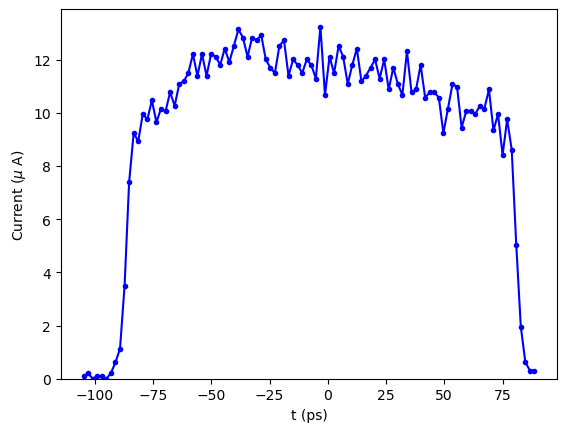

In [17]:
# Extract longitudinal positions (time) and charges
t1 = df1["t"]
q1 = df1["q"]
n1 = df1['nmacro']
# Define beam parameters
gamma1 = np.mean(df1["G"])

# Calculate beam current
f= 249.5e+6
num_particles1 = len(t1)
total_charge1 = np.sum(q1*n1)
pulse_length1 = np.max(t1) - np.min(t1)  # s
#current = total_charge / pulse_length
current1 = total_charge1*f
# Calculate current density
num_bins = 100
bin_edges1 = np.linspace(np.min(t1), np.max(t1), num_bins + 1)
bin_centers1 =0.5 * (bin_edges1[:-1] + bin_edges1[1:])
bin_widths1 = bin_edges1[1:] - bin_edges1[:-1]
hist1, _ = np.histogram(t1, bins=bin_edges1, weights=q1)
current_density1 = hist1*f/(bin_widths1 * num_particles1)

# Create longitudinal current profile plot
plt.plot((bin_centers1-np.mean(t1))*1e+12, current_density*current1*1e+6/1.95, '.-b', label = '98 $mu$A' )
plt.xlabel("t (ps)")
plt.ylim(0)
plt.ylabel("Current ($\mu$ A)")
#plt.title("longitudinal profile at 98 $\mu$A")
# Save the plot to a file
#plt.savefig('plot1.png')  # Specify the desired file name and extension
plt.show()
#plt.plot(x2, y2, '-.r', label='2.6 $\mu$A', )
#plt.plot(x2, super_gaussian(x2, A_fit, sigma_fit, m_fit), '-r', label='Fitted Curve')
#plt.title("longitudinal profile at 2.6 $\mu$A")
#plt.xlabel("t (ps)")
#plt.ylim(0)
#plt.savefig('plot.png')  # Specify the desired file name and extension
#plt.ylabel("Current ($\mu$ A)")
#plt.legend()
plt.show()

/var/folders/t7/yy62typn4y1cknks8l305k2h0000gn/T/ipykernel_32785/3437749214.py:15: RuntimeWarning: invalid value encountered in power
  return A1 * np.exp(-((np.abs(x1) / sigma1) ** (2 * m1)))


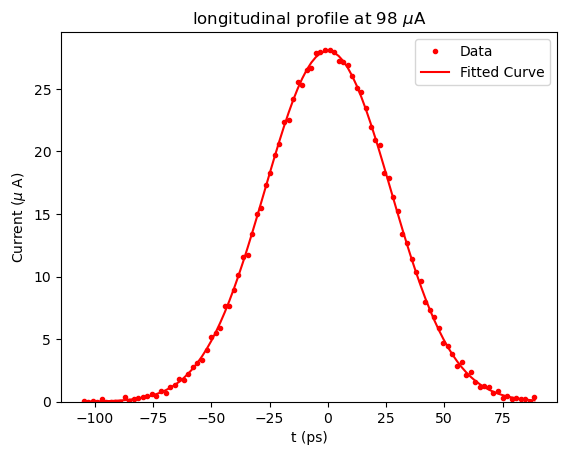

Fitted Parameters:
A = 28.0269092887751
sigma = 37.91784648909735
m = 1.011282629281217


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

x1 = (bin_centers1-np.mean(t1))*1e+12
y1 = current_density1*current1*1e+6/2.08


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the super-Gaussian function
def super_gaussian(x1, A1, sigma1, m1):
    return A1 * np.exp(-((np.abs(x1) / sigma1) ** (2 * m1)))

# Fit the data to the super-Gaussian function
initial_guess = [1, 1, 1]  # Initial guess for the parameters
params, _ = curve_fit(super_gaussian, x1, y1, p0=initial_guess)

# Extract the fitted parameters
A1_fit, sigma1_fit, m1_fit = params
# Extract the fitted parameters

# Plot the original data and the fitted curve
plt.plot(x1, y1, '.r', label='Data', )
plt.plot(x1, super_gaussian(x1, A1_fit, sigma1_fit, m1_fit), '-r', label='Fitted Curve')
plt.title("longitudinal profile at 98 $\mu$A")
plt.xlabel("t (ps)")
plt.ylim(0)
plt.savefig('plot1.png')  # Specify the desired file name and extension
plt.ylabel("Current ($\mu$ A)")
plt.legend()
plt.show()

print("Fitted Parameters:")
print("A =", A1_fit)
print("sigma =", sigma1_fit)
print("m =", m1_fit)

In [19]:
print(total_charge1)
print(current1)
print(pulse_length1)
#print(current_density)
print(np.mean(t1))
print(bin_widths1)
print(np.min(t1))

-3.927462925851648e-13
-9.799019999999862e-05
1.9552696210949993e-10
1.3093233956405928e-09
[1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.955269

In [20]:
print(bin_widths1) 
# Calculate the mean
mean = np.mean(t1)

# Calculate the squared differences
squared_diff = (df1['t'] - mean) ** 2

# Calculate the mean of the squared differences
mean_squared_diff = np.mean(squared_diff)

# Calculate the RMS sigma
rms_sigma = np.sqrt(mean_squared_diff)

print("RMS sigma:", rms_sigma)

[1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.95526962e-12 1.95526962e-12 1.95526962e-12
 1.95526962e-12 1.955269

In [21]:
print(total_charge)
print(current)
print(pulse_length)
#print(current_density)
print(np.mean(t))
print(bin_widths)

-3.680793587174297e-13
-9.18357999999987e-05
2.0879577376900081e-10
4.219391795402143e-08
[2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774e-12
 2.08795774e-12 2.08795774e-12 2.08795774e-12 2.08795774

In [22]:
import pandas as pd
df2 = pd.read_csv('currentdist2.6uA7.6m.csv',  delim_whitespace=True) 
# Replace 'data.txt' with the path to your .txt file
df2.head()

,x,y,z,rxy,Bx,By,Bz,G,t,m,q,nmacro,rmacro,ID
0,-0.000103,-0.000549,7.6,0.000559,0.000123,-0.000270,0.603727,1.254405,4.208938e-08,9.109530e-31,-1.602189e-19,6.564165,1.800000e-07,1.0
1,-0.000400,-0.000230,7.6,0.000461,-0.000269,0.000135,0.603723,1.254400,4.209471e-08,9.109530e-31,-1.602189e-19,6.564165,1.800000e-07,2.0
2,0.000080,-0.000194,7.6,0.000210,0.000902,-0.000483,0.603725,1.254402,4.209770e-08,9.109530e-31,-1.602189e-19,6.564165,1.800000e-07,3.0
3,-0.000087,-0.000028,7.6,0.000091,-0.000368,-0.000037,0.603724,1.254401,4.209834e-08,9.109530e-31,-1.602189e-19,6.564165,1.800000e-07,4.0
4,-0.000440,0.000250,7.6,0.000506,-0.000054,0.000143,0.603734,1.254413,4.210671e-08,9.109530e-31,-1.602189e-19,6.564165,1.800000e-07,5.0


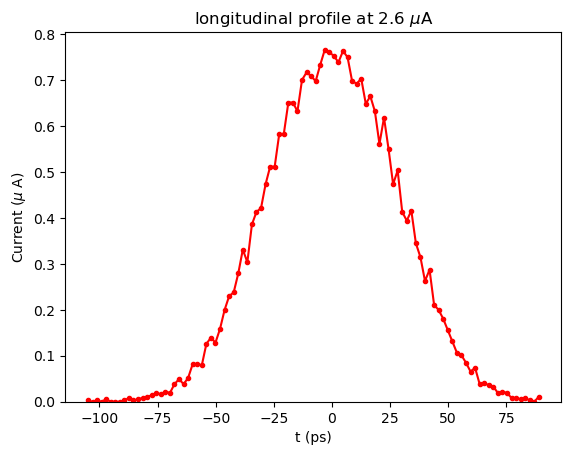

In [23]:
# Extract longitudinal positions (time) and charges
t2 = df2["t"]
q2 = df2["q"]
n2 = df2['nmacro']
# Define beam parameters
gamma2 = np.mean(df2["G"])

# Calculate beam current
f= 249.5e+6
num_particles2 = len(t2)
total_charge2 = np.sum(q2*n2)
pulse_length2 = np.max(t1) - np.min(t1)  # s
#current = total_charge / pulse_length
current2 = total_charge2*f
# Calculate current density
num_bins = 100
bin_edges2 = np.linspace(np.min(t2), np.max(t2), num_bins + 1)
bin_centers2 =0.5 * (bin_edges2[:-1] + bin_edges2[1:])
bin_widths2 = bin_edges2[1:] - bin_edges2[:-1]
hist2, _ = np.histogram(t2, bins=bin_edges2, weights=q2)
current_density2= hist2*f/(bin_widths2 * num_particles2)

# Create longitudinal current profile plot
plt.plot((bin_centers2-np.mean(t2))*1e+12, current_density2*current2*1e+6/1.958, '.-r')
plt.xlabel("t (ps)")
plt.ylim(0)
plt.ylabel("Current ($\mu$ A)")
plt.title("longitudinal profile at 2.6 $\mu$A")
# Save the plot to a file
plt.savefig('plot3.png')  # Specify the desired file name and extension
plt.show()






/var/folders/t7/yy62typn4y1cknks8l305k2h0000gn/T/ipykernel_32785/2373261846.py:30: RuntimeWarning: invalid value encountered in power
  return A * np.exp(-((np.abs(x2) / sigma) ** (2 * m)))


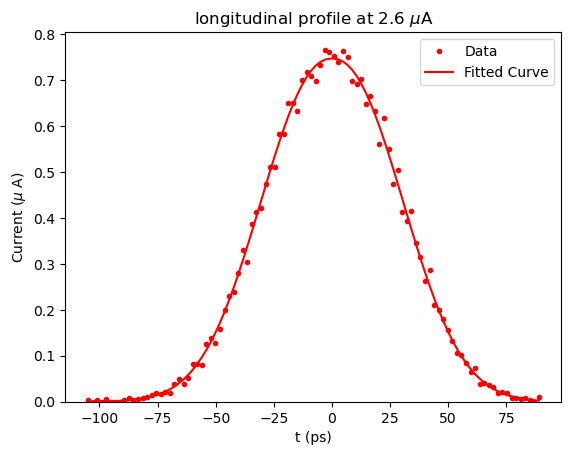

Fitted Parameters:
A = 0.7468471869214647
sigma = 40.456609905553776
m = 1.1025514437152297


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Calculate beam current
f= 249.5e+6
num_particles2 = len(t2)
total_charge2 = np.sum(q2*n2)
pulse_length2 = np.max(t1) - np.min(t1)  # s
#current = total_charge / pulse_length
current2 = total_charge2*f
# Calculate current density
num_bins = 100
bin_edges2 = np.linspace(np.min(t2), np.max(t2), num_bins + 1)
bin_centers2 =0.5 * (bin_edges2[:-1] + bin_edges2[1:])
bin_widths2 = bin_edges2[1:] - bin_edges2[:-1]
hist2, _ = np.histogram(t2, bins=bin_edges2, weights=q2)
current_density2= hist2*f/(bin_widths2 * num_particles2)

x2= (bin_centers2-np.mean(t2))*1e+12
y2=current_density2*current2*1e+6/1.958


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the super-Gaussian function
def super_gaussian(x2, A, sigma, m):
    return A * np.exp(-((np.abs(x2) / sigma) ** (2 * m)))

# Fit the data to the super-Gaussian function
initial_guess = [1, 1, 1]  # Initial guess for the parameters
params, _ = curve_fit(super_gaussian, x2, y2, p0=initial_guess)

# Extract the fitted parameters
A_fit, sigma_fit, m_fit = params
# Extract the fitted parameters

# Plot the original data and the fitted curve
plt.plot(x2, y2, '.r', label='Data', )
plt.plot(x2, super_gaussian(x2, A_fit, sigma_fit, m_fit), '-r', label='Fitted Curve')
plt.title("longitudinal profile at 2.6 $\mu$A")
plt.xlabel("t (ps)")
plt.ylim(0)
plt.savefig('plot2.png')  # Specify the desired file name and extension
plt.ylabel("Current ($\mu$ A)")
plt.legend()
plt.show()

print("Fitted Parameters:")
print("A =", A_fit)
print("sigma =", sigma_fit)
print("m =", m_fit)

In [25]:
bin_widths2 

array([1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e-12,
       1.9581133e-12, 1.9581133e-12, 1.9581133e-12, 1.9581133e

In [26]:
mean2 = np.mean(t2)

# Calculate the squared differences
squared_diff2 = (df2['t'] - mean2) ** 2

# Calculate the mean of the squared differences
mean_squared_diff2 = np.mean(squared_diff2)

# Calculate the RMS sigma
rms_sigma2 = np.sqrt(mean_squared_diff2)

print("RMS sigma:", rms_sigma2)

RMS sigma: 2.734343961104402e-11
